In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio.Data import CodonTable
import matplotlib.mlab as mlab

In [2]:
file = open("grantham.dist4", "r")
original = []
for line in file.readlines():
    original.append(line.replace("\n", "").split("\t"))
file.close()
original

[['A', 'A', '0'],
 ['A', 'C', '195'],
 ['A', 'D', '126'],
 ['A', 'E', '107'],
 ['A', 'F', '113'],
 ['A', 'G', '60'],
 ['A', 'H', '86'],
 ['A', 'I', '94'],
 ['A', 'K', '106'],
 ['A', 'L', '96'],
 ['A', 'M', '84'],
 ['A', 'N', '111'],
 ['A', 'P', '27'],
 ['A', 'Q', '91'],
 ['A', 'R', '112'],
 ['A', 'S', '99'],
 ['A', 'T', '58'],
 ['A', 'V', '64'],
 ['A', 'W', '148'],
 ['A', 'Y', '112'],
 ['C', 'A', '195'],
 ['C', 'C', '0'],
 ['C', 'D', '154'],
 ['C', 'E', '170'],
 ['C', 'F', '205'],
 ['C', 'G', '159'],
 ['C', 'H', '174'],
 ['C', 'I', '198'],
 ['C', 'K', '202'],
 ['C', 'L', '198'],
 ['C', 'M', '196'],
 ['C', 'N', '139'],
 ['C', 'P', '169'],
 ['C', 'Q', '154'],
 ['C', 'R', '180'],
 ['C', 'S', '112'],
 ['C', 'T', '149'],
 ['C', 'V', '192'],
 ['C', 'W', '215'],
 ['C', 'Y', '194'],
 ['D', 'A', '126'],
 ['D', 'C', '154'],
 ['D', 'D', '0'],
 ['D', 'E', '45'],
 ['D', 'F', '177'],
 ['D', 'G', '94'],
 ['D', 'H', '81'],
 ['D', 'I', '168'],
 ['D', 'K', '101'],
 ['D', 'L', '172'],
 ['D', 'M', '160'],

In [3]:
amino_acid = np.unique(np.array(original)[:, 0])
amino_acid

array(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y'],
      dtype='<U3')

In [4]:
aa_distance = pd.DataFrame(np.NaN, index=amino_acid, columns=amino_acid)
for pair in original:
    aa_distance.loc[pair[0], pair[1]] = pair[2]
Grantham_distance = aa_distance.astype(int)
Grantham_distance

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
A,0,195,126,107,113,60,86,94,106,96,...,111,27,91,112,99,58,64,148,500,112
C,195,0,154,170,205,159,174,198,202,198,...,139,169,154,180,112,149,192,215,500,194
D,126,154,0,45,177,94,81,168,101,172,...,23,108,61,96,65,85,152,181,500,160
E,107,170,45,0,140,98,40,134,56,138,...,42,93,29,54,80,65,121,152,500,122
F,113,205,177,140,0,153,100,21,102,22,...,158,114,116,97,155,103,50,40,500,22
G,60,159,94,98,153,0,98,135,127,138,...,80,42,87,125,56,59,109,184,500,147
H,86,174,81,40,100,98,0,94,32,99,...,68,77,24,29,89,47,84,115,500,83
I,94,198,168,134,21,135,94,0,102,5,...,149,95,109,97,142,89,29,61,500,33
K,106,202,101,56,102,127,32,102,0,107,...,94,103,53,26,121,78,97,110,500,85
L,96,198,172,138,22,138,99,5,107,0,...,153,98,113,102,145,92,32,61,500,36


In [5]:
Grantham_D = np.array(Grantham_distance)
Grantham_D

array([[  0, 195, 126, 107, 113,  60,  86,  94, 106,  96,  84, 111,  27,
         91, 112,  99,  58,  64, 148, 500, 112],
       [195,   0, 154, 170, 205, 159, 174, 198, 202, 198, 196, 139, 169,
        154, 180, 112, 149, 192, 215, 500, 194],
       [126, 154,   0,  45, 177,  94,  81, 168, 101, 172, 160,  23, 108,
         61,  96,  65,  85, 152, 181, 500, 160],
       [107, 170,  45,   0, 140,  98,  40, 134,  56, 138, 126,  42,  93,
         29,  54,  80,  65, 121, 152, 500, 122],
       [113, 205, 177, 140,   0, 153, 100,  21, 102,  22,  28, 158, 114,
        116,  97, 155, 103,  50,  40, 500,  22],
       [ 60, 159,  94,  98, 153,   0,  98, 135, 127, 138, 127,  80,  42,
         87, 125,  56,  59, 109, 184, 500, 147],
       [ 86, 174,  81,  40, 100,  98,   0,  94,  32,  99,  87,  68,  77,
         24,  29,  89,  47,  84, 115, 500,  83],
       [ 94, 198, 168, 134,  21, 135,  94,   0, 102,   5,  10, 149,  95,
        109,  97, 142,  89,  29,  61, 500,  33],
       [106, 202, 101,  

In [6]:
scaled_aa = pd.read_table("aa-scaled.txt", index_col=0)
scaled_aa

,polarity,hydropathy,volume,iso.electricity
aa,,,,
X,-1.5993,1.6720,-1.5833,-2.6562
A,-0.0796,0.6402,-0.9414,0.1086
R,0.7182,-1.3910,0.9842,2.3020
D,2.2000,-1.0686,-0.4652,-1.3798
N,1.0602,-1.0686,-0.4238,-0.1633
C,-0.9154,0.8659,-0.4445,-0.3199
E,2.0100,-1.0686,-1.4115,-1.1724
Q,0.5283,-1.0686,0.1767,-0.0527
G,0.2623,-0.0691,-1.5212,0.0948


In [7]:
aa_distance = pd.DataFrame(np.NaN, index=amino_acid, columns=amino_acid)
for aa1 in scaled_aa.index:
    for aa2 in scaled_aa.index:
        Eu_dist = np.sqrt(np.square(scaled_aa.loc[aa1, 'polarity'] - scaled_aa.loc[aa2, 'polarity']) + np.square(scaled_aa.loc[aa1, 'hydropathy'] - scaled_aa.loc[aa2, 'hydropathy']))
        aa_distance.loc[aa1, aa2] = Eu_dist
Scaled_distance = aa_distance
Scaled_distance

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
A,0.000000,0.865738,2.848960,2.699338,0.825502,0.787402,1.697582,1.180860,1.944808,1.025856,...,2.054055,1.106688,1.813709,2.182260,0.859562,0.820207,0.939063,1.107018,1.836872,1.169847
C,0.865738,0.000000,3.667152,3.507172,0.123008,1.503729,2.290876,0.646019,2.683128,0.420919,...,2.765011,1.488288,2.413827,2.786081,1.477959,1.237735,0.626800,1.106674,1.057126,1.246216
D,2.848960,3.667152,0.000000,0.190000,3.655782,2.180294,1.750373,4.015432,1.113530,3.874312,...,1.139800,2.507580,1.671700,1.516467,2.263669,2.593786,3.750777,3.079786,4.684610,2.973342
E,2.699338,3.507172,0.190000,0.000000,3.499404,2.013320,1.560699,3.871742,0.925940,3.725182,...,0.949800,2.323801,1.481700,1.331424,2.089557,2.416572,3.610549,2.897421,4.531880,2.789196
F,0.825502,0.123008,3.655782,3.499404,0.000000,1.509495,2.326247,0.549409,2.692945,0.324620,...,2.781194,1.543455,2.448889,2.822469,1.499922,1.281817,0.505713,1.195418,1.039424,1.330710
G,0.787402,1.503729,2.180294,2.013320,1.509495,0.000000,0.922577,1.948076,1.183839,1.769964,...,1.278923,0.627398,1.034290,1.398308,0.199285,0.503277,1.721455,1.038389,2.548918,0.993145
H,1.697582,2.290876,1.750373,1.560699,2.326247,0.922577,0.000000,2.816363,0.649113,2.619571,...,0.615543,0.856663,0.122991,0.496334,0.845968,1.057126,2.612406,1.424128,3.346531,1.293995
I,1.180860,0.646019,4.015432,3.871742,0.549409,1.948076,2.816363,0.000000,3.122609,0.225700,...,3.226081,2.070111,2.937566,3.311553,1.973851,1.796676,0.282938,1.744822,0.739679,1.879717
K,1.944808,2.683128,1.113530,0.925940,2.692945,1.183839,0.649113,3.122609,0.000000,2.951280,...,0.165618,1.404325,0.592260,0.615036,1.216082,1.522609,2.883130,1.981008,3.732266,1.867923
L,1.025856,0.420919,3.874312,3.725182,0.324620,1.769964,2.619571,0.225700,2.951280,0.000000,...,3.048639,1.857010,2.741513,3.115678,1.782030,1.588134,0.295540,1.519674,0.819043,1.655329


In [8]:
Scaled_D = np.array(Scaled_distance)
Scaled_D

array([[ 0.        ,  0.86573791,  2.84896009,  2.69933799,  0.82550243,
         0.78740212,  1.69758182,  1.18085952,  1.94480811,  1.02585615,
         0.64670712,  2.05405489,  1.10668805,  1.81370887,  2.1822599 ,
         0.85956203,  0.82020729,  0.93906273,  1.10701827,  1.83687216,
         1.16984728],
       [ 0.86573791,  0.        ,  3.66715249,  3.507172  ,  0.12300833,
         1.50372946,  2.29087584,  0.64601858,  2.68312837,  0.4209188 ,
         0.27104533,  2.76501096,  1.4882883 ,  2.41382682,  2.78608086,
         1.47795861,  1.23773476,  0.62680017,  1.10667432,  1.05712649,
         1.24621565],
       [ 2.84896009,  3.66715249,  0.        ,  0.19      ,  3.65578171,
         2.18029391,  1.75037315,  4.01543212,  1.11352983,  3.87431213,
         3.40440589,  1.1398    ,  2.50757997,  1.6717    ,  1.51646728,
         2.26366924,  2.59378611,  3.75077746,  3.07978557,  4.68460979,
         2.97334202],
       [ 2.69933799,  3.507172  ,  0.19      ,  0.        

In [9]:
aa_cities = pd.read_csv("aa.as.cities", names=['aa'], header=None)
aa_counts = aa_cities.aa.value_counts()
aa_counts

L    6
S    6
R    6
G    4
P    4
A    4
V    4
T    4
I    3
X    3
H    2
N    2
C    2
Q    2
E    2
K    2
D    2
F    2
Y    2
M    1
W    1
Name: aa, dtype: int64

In [10]:
aa_counts.values[0:5]

array([6, 6, 6, 4, 4], dtype=int64)

In [11]:
K = np.random.random((len(amino_acid), 64))
pd.DataFrame(K, index=aa_counts.index, columns=np.arange(64))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
L,0.144518,0.000644,0.787801,0.106264,0.007261,0.605717,0.045992,0.612491,0.603953,0.934628,...,0.441469,0.738420,0.726053,0.428059,0.151346,0.172899,0.088475,0.975534,0.293079,0.136921
S,0.038472,0.207592,0.491433,0.175478,0.414250,0.432012,0.148773,0.366206,0.757264,0.675506,...,0.617823,0.992641,0.441320,0.260626,0.213318,0.524338,0.645833,0.540860,0.877336,0.800825
R,0.881098,0.545488,0.021503,0.117135,0.660132,0.730225,0.217307,0.353751,0.966923,0.178047,...,0.425097,0.751206,0.076925,0.557335,0.482644,0.167562,0.576755,0.179948,0.174058,0.100519
G,0.008328,0.981313,0.142836,0.414716,0.903040,0.154261,0.679482,0.671151,0.735348,0.471367,...,0.225675,0.754828,0.806563,0.415150,0.793973,0.394227,0.246905,0.358941,0.352920,0.394568
P,0.689148,0.521019,0.101411,0.490115,0.999548,0.037547,0.522871,0.735487,0.906777,0.902659,...,0.523108,0.525127,0.497991,0.884509,0.477116,0.797650,0.836740,0.301127,0.820628,0.203719
A,0.919347,0.052919,0.833515,0.037051,0.072815,0.810940,0.781071,0.700222,0.384241,0.787520,...,0.823591,0.155213,0.758782,0.644009,0.714017,0.904513,0.886180,0.973732,0.593870,0.803907
V,0.852579,0.155910,0.422015,0.939767,0.680329,0.117487,0.713942,0.080865,0.582760,0.928383,...,0.416818,0.507829,0.225824,0.605674,0.470205,0.612497,0.654147,0.468845,0.401284,0.893963
T,0.576742,0.182874,0.997713,0.264446,0.763329,0.866717,0.997690,0.341600,0.271491,0.669894,...,0.829675,0.696822,0.355216,0.407312,0.515922,0.530740,0.841972,0.995689,0.862049,0.050789
I,0.485749,0.929218,0.470634,0.083292,0.983163,0.785744,0.412607,0.499275,0.925229,0.493713,...,0.102042,0.583774,0.224692,0.826597,0.680529,0.698316,0.414784,0.108620,0.673644,0.422153
X,0.459241,0.993950,0.237129,0.697561,0.489357,0.483045,0.906301,0.486456,0.858980,0.679094,...,0.402948,0.533298,0.450182,0.724887,0.152582,0.779649,0.957288,0.420301,0.924481,0.204072


In [12]:
aa_num = 21
cd_num = 64
def I(i):
    if i + 1 > cd_num - 1:
        return(i - 1, 0)
    elif i - 1 < 0:
        return(cd_num - 1, i + 1)
    else:
        return(i - 1, i + 1)

In [13]:
polarity_dist = pd.DataFrame(np.NaN, index=amino_acid, columns=amino_acid)
for aa1 in scaled_aa.index:
    for aa2 in scaled_aa.index:
        polarity_dist.loc[aa1, aa2] = np.absolute(scaled_aa.loc[aa1, 'polarity'] - scaled_aa.loc[aa2, 'polarity'])
D_polarity = np.array(polarity_dist)
polarity_dist

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
A,0.0000,0.8358,2.2796,2.0896,0.7599,0.3419,0.5319,0.7978,1.1778,0.7978,...,1.1398,0.1520,0.6079,0.7978,0.1900,0.1520,0.5319,0.6839,1.5197,0.6079
C,0.8358,0.0000,3.1154,2.9254,0.0759,1.1777,1.3677,0.0380,2.0136,0.0380,...,1.9756,0.6838,1.4437,1.6336,1.0258,0.6838,0.3039,0.1519,0.6839,0.2279
D,2.2796,3.1154,0.0000,0.1900,3.0395,1.9377,1.7477,3.0774,1.1018,3.0774,...,1.1398,2.4316,1.6717,1.4818,2.0896,2.4316,2.8115,2.9635,3.7993,2.8875
E,2.0896,2.9254,0.1900,0.0000,2.8495,1.7477,1.5577,2.8874,0.9118,2.8874,...,0.9498,2.2416,1.4817,1.2918,1.8996,2.2416,2.6215,2.7735,3.6093,2.6975
F,0.7599,0.0759,3.0395,2.8495,0.0000,1.1018,1.2918,0.0379,1.9377,0.0379,...,1.8997,0.6079,1.3678,1.5577,0.9499,0.6079,0.2280,0.0760,0.7598,0.1520
G,0.3419,1.1777,1.9377,1.7477,1.1018,0.0000,0.1900,1.1397,0.8359,1.1397,...,0.7979,0.4939,0.2660,0.4559,0.1519,0.4939,0.8738,1.0258,1.8616,0.9498
H,0.5319,1.3677,1.7477,1.5577,1.2918,0.1900,0.0000,1.3297,0.6459,1.3297,...,0.6079,0.6839,0.0760,0.2659,0.3419,0.6839,1.0638,1.2158,2.0516,1.1398
I,0.7978,0.0380,3.0774,2.8874,0.0379,1.1397,1.3297,0.0000,1.9756,0.0000,...,1.9376,0.6458,1.4057,1.5956,0.9878,0.6458,0.2659,0.1139,0.7219,0.1899
K,1.1778,2.0136,1.1018,0.9118,1.9377,0.8359,0.6459,1.9756,0.0000,1.9756,...,0.0380,1.3298,0.5699,0.3800,0.9878,1.3298,1.7097,1.8617,2.6975,1.7857
L,0.7978,0.0380,3.0774,2.8874,0.0379,1.1397,1.3297,0.0000,1.9756,0.0000,...,1.9376,0.6458,1.4057,1.5956,0.9878,0.6458,0.2659,0.1139,0.7219,0.1899


In [14]:
K = np.random.random(size=(21, 21))
pd.DataFrame(K, index=amino_acid, columns=amino_acid)

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
A,0.634365,0.505755,0.950186,0.880847,0.416346,0.231413,0.887841,0.332894,0.310620,0.637385,...,0.769008,0.045372,0.804973,0.059734,0.184015,0.173140,0.187970,0.215485,0.193981,0.461929
C,0.086448,0.192648,0.771151,0.827093,0.495051,0.832415,0.455377,0.704917,0.467396,0.072311,...,0.698814,0.604350,0.242319,0.790732,0.775199,0.240599,0.723507,0.433032,0.966753,0.892680
D,0.223467,0.989635,0.972535,0.571679,0.719864,0.514726,0.242801,0.776680,0.026495,0.958127,...,0.362171,0.169020,0.369948,0.797411,0.246916,0.341494,0.659495,0.797217,0.510605,0.485685
E,0.685355,0.870494,0.514944,0.709558,0.263096,0.832852,0.248898,0.038108,0.581239,0.977891,...,0.346143,0.611669,0.629471,0.111572,0.332859,0.252528,0.731454,0.858399,0.851123,0.480320
F,0.563876,0.899129,0.748528,0.195062,0.128903,0.994095,0.523274,0.302700,0.728782,0.244954,...,0.726884,0.591998,0.970185,0.484702,0.715144,0.502497,0.955730,0.797453,0.302646,0.590188
G,0.727076,0.074415,0.334755,0.317371,0.771355,0.962547,0.344173,0.827254,0.990722,0.053327,...,0.061112,0.279131,0.552905,0.559591,0.840168,0.937806,0.410254,0.346287,0.819982,0.285212
H,0.009267,0.321021,0.400127,0.449232,0.853796,0.962296,0.145978,0.432016,0.081967,0.273930,...,0.530019,0.244054,0.965426,0.139849,0.478739,0.277777,0.696865,0.696413,0.369193,0.055722
I,0.194135,0.286806,0.500146,0.652192,0.033131,0.512145,0.900534,0.961775,0.737982,0.966502,...,0.429373,0.730309,0.268184,0.934918,0.346979,0.982086,0.882612,0.227120,0.990260,0.505541
K,0.874421,0.998041,0.070245,0.717963,0.080506,0.942242,0.207716,0.273947,0.064434,0.830485,...,0.977938,0.580418,0.018242,0.491913,0.848850,0.833377,0.808849,0.190000,0.235148,0.911234
L,0.542462,0.789771,0.673818,0.013072,0.798586,0.620895,0.023224,0.257452,0.479291,0.446066,...,0.640940,0.751309,0.343271,0.279532,0.265272,0.389105,0.379921,0.408509,0.233544,0.384191


In [15]:
aa_num = 21
cd_num = 64
def I(i):
    if i + 1 > aa_num - 1:
        return(i - 1, 0)
    elif i - 1 < 0:
        return(aa_num - 1, i + 1)
    else:
        return(i - 1, i + 1)

In [227]:
V = np.copy(K)
dp = D_polarity.max() * 0.2
T = 0.09

In [228]:
dp

0.75986000000000009

In [235]:
E = 0
for X in range(aa_num):
    Uxi_exp_accum = 0
    Uxi_ls = []
    for i in range(aa_num):
        cstr = 0
        dist = 0
        # calculate Uxi
        for Y in range(aa_num):
            if Y != X:
                cstr += V[Y, i]
                dist += D_polarity[X, Y] * (V[Y, I(i)[0]] + V[Y, I(i)[1]])
        Uxi = - dp * cstr - dist
        
        Uxi_ls.append(Uxi)
        Uxi_exp_accum += np.exp(Uxi / T)
    # update Vxi
    for i in range(aa_num):
        V[X, i] = np.exp(Uxi_ls[i] / T) / Uxi_exp_accum
        
        # calculate E
        E += - V[X, i] * Uxi_ls[i]
E

13.026715507842869

In [236]:
out_V = pd.DataFrame(np.round(V), index=amino_acid).astype(int)
out_V

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
len(np.where(np.round(V) == 1)[1])

21

In [238]:
visitation = pd.DataFrame(np.where(np.round(V) == 1)[1], index=amino_acid, columns=['visitation'])
visitation

,visitation
A,5
C,8
D,14
E,12
F,7
G,14
H,12
I,9
K,20
L,10


In [239]:
original_order = pd.DataFrame(scaled_aa['polarity'].sort_values())
original_order

,polarity
aa,
X,-1.5993
C,-0.9154
L,-0.8774
I,-0.8774
F,-0.8395
W,-0.7635
M,-0.7255
Y,-0.6875
V,-0.6115


In [240]:
visitation = visitation.reindex(original_order.index)
visitation

,visitation
aa,
X,16
C,8
L,10
I,9
F,7
W,3
M,1
Y,2
V,1


In [241]:
def df_transform(df):
    anchor = df.loc['X', 'visitation']
    shift_up = int(df.max() - anchor) + 1
    for i in df.index:
        if df.loc[i, 'visitation'] >= anchor:
            df.loc[i, 'visitation'] = df.loc[i, 'visitation'] - anchor
        else:
            df.loc[i, 'visitation'] = df.loc[i, 'visitation'] + shift_up
    return(df)
df_transform(visitation)

,visitation
aa,
X,0
C,13
L,15
I,14
F,12
W,8
M,6
Y,7
V,6


In [242]:
visitation

,visitation
aa,
X,0
C,13
L,15
I,14
F,12
W,8
M,6
Y,7
V,6


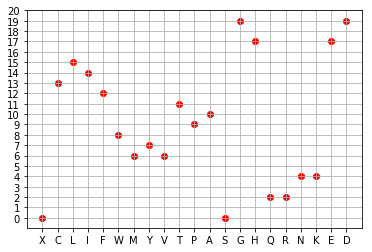

In [243]:
def visual(df):
    plt.scatter(np.arange(21), df['visitation'], color='red')
    plt.xticks(np.arange(21), original_order.index)
    plt.yticks(np.arange(21), np.arange(21))
    plt.grid()
    plt.show()
visual(visitation)

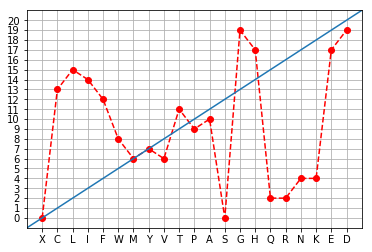

In [244]:
def visual(df):
    plt.plot(np.arange(21), df['visitation'], '--ro')
    plt.plot([-1, 22], [-1, 22])
    plt.xlim(-1, 21)
    plt.ylim(-1, 21)
    plt.xticks(np.arange(21), original_order.index)
    plt.yticks(np.arange(21), np.arange(21))
    plt.grid()
    plt.show()
visual(visitation)